<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [11]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

plt.style.use('ggplot')

import sklearn
sklearn.__version__

'0.23.2'

In [12]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [14]:
df_new = df.drop("Unnamed: 32", axis =1)
df_new.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
df_new.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### 3. Set up the `diagnosis` variable as your target. How many classes are there?

What is this? 

In [17]:
# ANSWER

columns = df_new.columns
X = df_new[[col for col in columns if col != "id" and col != "diagnosis"]] #use rest of the columns as features.Therefore, any feature that is not id and not diagnosis which will be X  
y = df_new['diagnosis'] #predictor
y.replace('B', 0, inplace = True) #diagnosis in y which we will replace in 0. Beign tumor is 0
y.replace('M',1, inplace = True) #diagnosis in y which we will replace in 1. Malignant tumor is 1
y



0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

### 4. What is the baseline accuracy?

Baseline Accuracy means

In [18]:
# ANSWER
1- y.mean() # most frequently occuring class. In this case, it should be benign because 0 occurs more frequently than 1

# If we predict everything to be benign, we will get an accuracy of __% and we want to beat this score.



0.6274165202108963

### 5. Choose features to be your predictor variables and set up your X.

In [19]:
# ANSWER
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [21]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=1)

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [22]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values
knn.score(X,y)

1.0

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [23]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 2: train the model on the training set (using K=1)

knn.fit(X_train,y_train)


# STEP 3: test the model on the testing set, and check the accuracy

knn.score(X_test, y_test)


0.9298245614035088

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [24]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data

knn = KNeighborsClassifier(n_neighbors= len(X_train))

# Fit Train Data

knn.fit(X_train, y_train)

# Print accuracy_score
knn.score(X_test, y_test)


1-y.mean()

0.6274165202108963

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [27]:
# ANSWER
# plot test accuracy by number of neighbors:

# Create empty lists

test_accuracy= []
num_neighbours= []


#plot test accuracy by number of neighbors:

start = 1
stop = len(X_train) + 1

for k in range(start, stop): # start is 1 to start from 0 and stop is len(X_train) + 1 because when you stop, you will want to include the last value
    
    #2. Instantiate Model
    
    knn = KNeighborsClassifier(n_neighbors=k) #Eeach loop we will call this model
    
    #3. Fit and Score
    
    knn.fit(X_train, y_train)
    
    score = knn.score(X_test,y_test)
    
    #4. Append to list
    
    test_accuracy.append(score)
    
    num_neighbours.append(k)
    

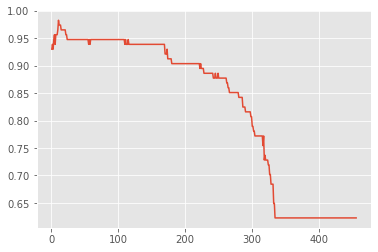

In [28]:
plt.plot(num_neighbours,test_accuracy)

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [41]:
# ANSWER

test_accuracy= []
num_neighbours= []


#1. Plot test accuracy by number of neighbors:

start = 1
stop = len(X_train) + 1

for k in range(start, 350): # start is 1 to start from 0 and stop is len(X_train) + 1 because when you stop, you will want to include the last value
    
    #2. Instantiate Model
    
    knn = KNeighborsClassifier(n_neighbors=k) #Eeach loop we will call this model
    
    scores = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv=5 )
    
    score = sum(scores) / len(scores)
    
    #3. Append to list
    
    test_accuracy.append(score)
    
    num_neighbours.append(k)




In [ ]:
return score

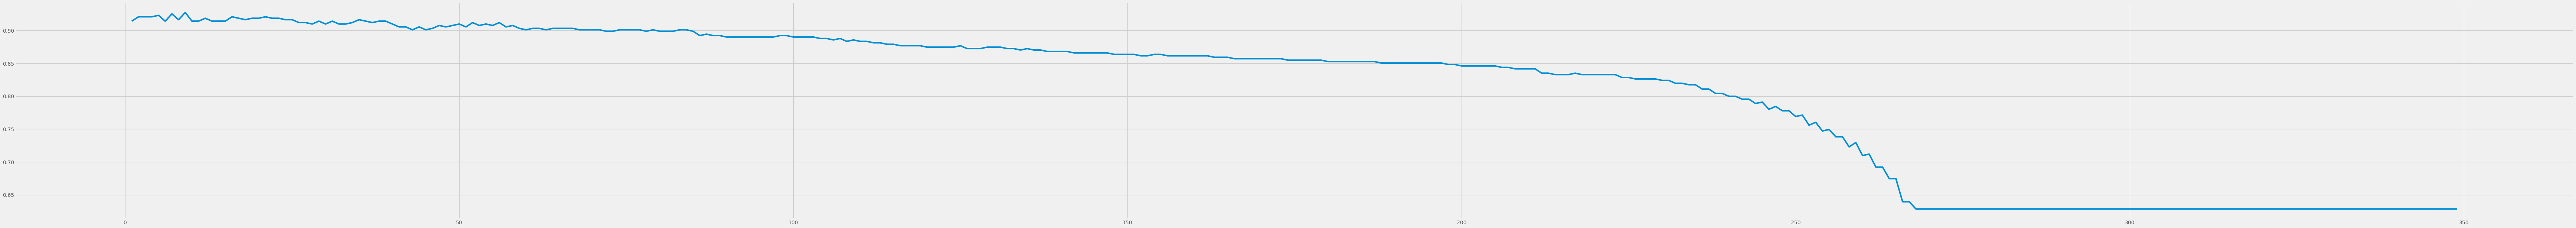

In [44]:
plt.figure(figsize = (110,10))
plt.plot(num_neighbours,test_accuracy)

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [96]:
# ANSWER
# Standarize X #Standard Scalar to be used

from sklearn.preprocessing import StandardScaler

test_accuracy_standardized= []
num_neighbours= []


#plot test accuracy by number of neighbors:

start = 1
stop = len(X_train) + 1

for k in range(start, 350): # start is 1 to start from 0 and stop is len(X_train) + 1 because when you stop, you will want to include the last value
    
    #2. Instantiate Model
    
    knn = KNeighborsClassifier(n_neighbors=k) #Eeach loop we will call this model
    
    scores = cross_val_score(knn, X_train, y_train, scoring = 'accuracy', cv=5 ).reshape(-1, 1)
    
    scaler = StandardScaler().fit(scores)
    
    #4. Append to list
    
    test_accuracy_standardized.append(scaler.mean_)
    
    num_neighbours.append(k)


    

C:\Users\Para Raja Singham\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


ValueError: x and y must have same first dimension, but have shapes (349,) and (2094,)

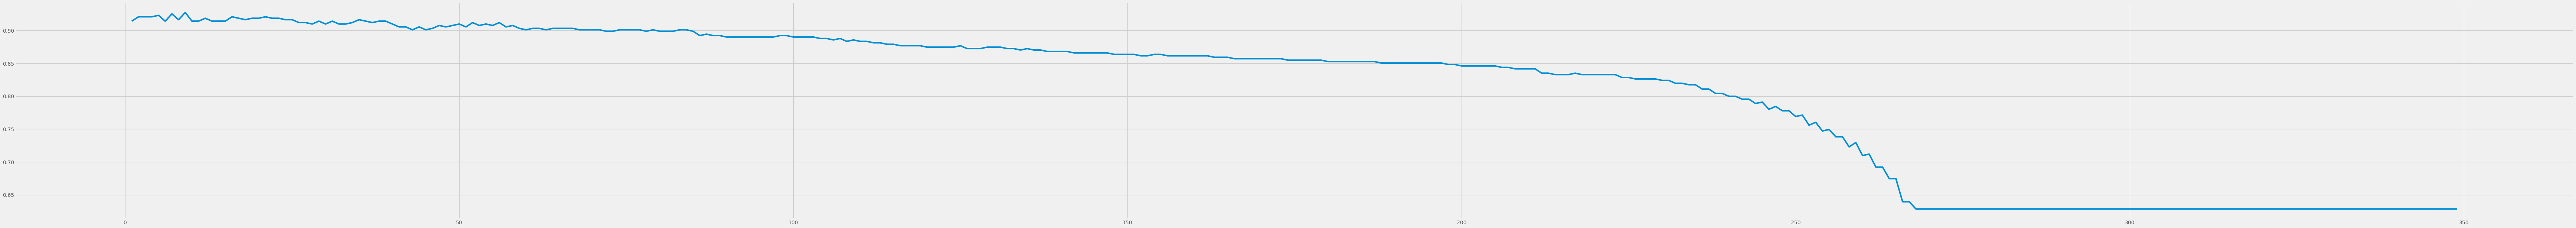

In [97]:
# ANSWER
# plot test accuracy by number of neighbors:

plt.figure(figsize = (110,10))
plt.plot(num_neighbours,test_accuracy_standardized, label = "line 1")
plt.plot(num_neighbours,test_accuracy, label = "line 2")


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



